# Setup

In [19]:
from imports import *
from utils import *
from agents import UrnAgent, QLearningAgent
from environment import NetMultiAgentEnv
from simulation_function import simulation_function

# Urn Agent

In [20]:
n_agents = 2
n_features = 2
agents_observed_variables = {0:[0],1:[1]}

G = nx.DiGraph()
G.add_nodes_from([0,1])  # Adds multiple nodes at once
G.add_edges_from([(0, 1), (1, 0)])  # Adds multiple edges

n_signaling_actions = 2
n_final_actions = 4
n_episodes=3000

randomcannonical_game = {}
for i in range(n_agents):
  randomcannonical_game[i] = create_random_canonical_game(n_features,n_final_actions,n=1,m=0)

with_signals, full_information = True, False

rewards_histories = {}
signal_information_histories = {}
for init_weights in tqdm([[1,1],[2,1],[10,1],[1,0]]):
  
  env = NetMultiAgentEnv(n_agents=n_agents, n_features=n_features,
                    n_signaling_actions=n_signaling_actions,
                    n_final_actions=n_final_actions,
                    full_information = full_information,
                    game_dicts=randomcannonical_game,
                    observed_variables = agents_observed_variables,
                    agent_type=UrnAgent,
                    initialize = True,initialization_weights = init_weights,
                    graph=G)

  signal_usage, rewards_history, signal_information_history, nature_history, histories = simulation_function(n_agents=n_agents,
                        n_features=n_features, n_signaling_actions=n_signaling_actions, n_final_actions=n_final_actions,
                        n_episodes=n_episodes, with_signals = with_signals,
                        plot=False,env=env, verbose=False)
  rewards_histories[str(init_weights)] = rewards_history
  signal_information_histories[str(init_weights)] = signal_information_history

100%|██████████| 4/4 [00:06<00:00,  1.69s/it]


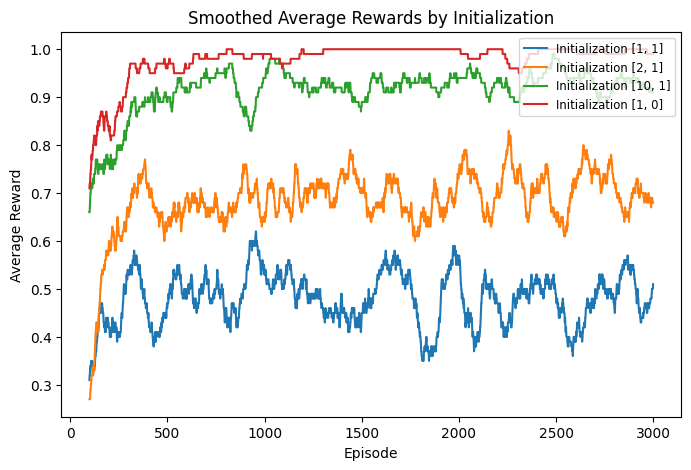

In [21]:
plt.figure(figsize=(8, 5)) # (width, height)
for key in rewards_histories:
# first smoothing
    #smoothed_rewards = [sum(rewards_history[i][j:j+100]) / 100 for j in range(0, n_episodes, 100)]
    #plt.plot(range(0, n_episodes, 100), smoothed_rewards, label=f"Agent {i}")
    # second smoothing
    window_size = 100
    smoothed_rewards = np.convolve(rewards_histories[key][0], np.ones(window_size)/window_size, mode='valid')
    plt.plot(range(window_size - 1, n_episodes), smoothed_rewards, label=f"Initialization {key}")

    plt.title("Smoothed Average Rewards by Initialization")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.legend(loc="upper right", fontsize="small")  # You can also use a numeric value like fontsize=8


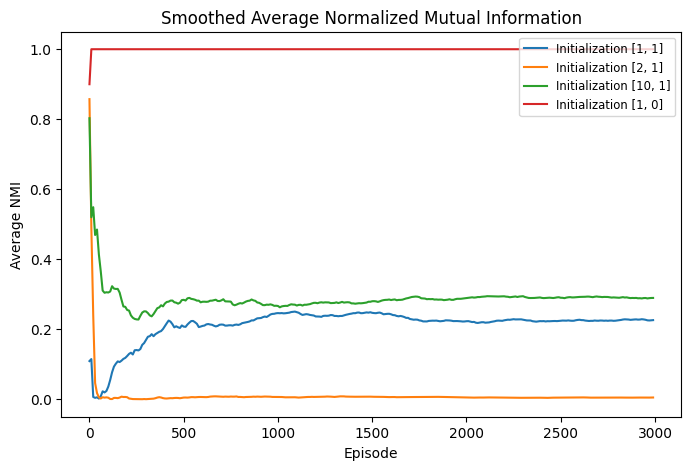

In [22]:
plt.figure(figsize=(8, 5)) # (width, height)
for key in signal_information_histories:
# first smoothing
    #smoothed_rewards = [sum(rewards_history[i][j:j+100]) / 100 for j in range(0, n_episodes, 100)]
    #plt.plot(range(0, n_episodes, 100), smoothed_rewards, label=f"Agent {i}")
    # second smoothing
    smoothed_NMI = [sum(signal_information_histories[key][0][j:j+10]) / 10 for j in range(0, n_episodes, 10)]
    plt.plot(range(0, n_episodes, 10), smoothed_NMI, label=f"Initialization {key}")

    plt.title("Smoothed Average Normalized Mutual Information")
    plt.xlabel("Episode")
    plt.ylabel("Average NMI")
    plt.legend(loc="upper right", fontsize="small")  # You can also use a numeric value like fontsize=8


# In Greyscale

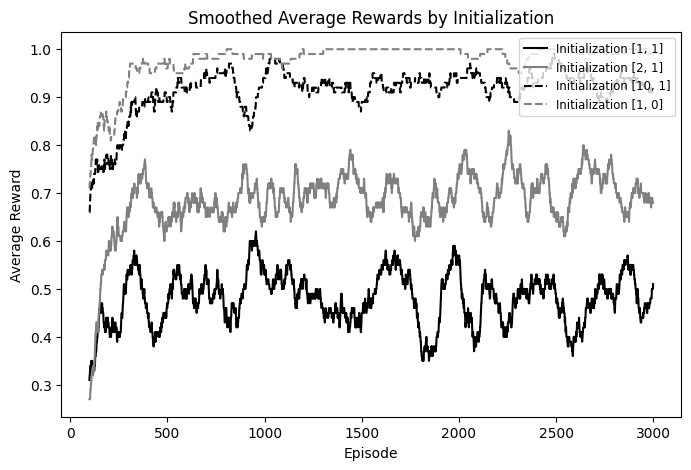

In [23]:
plt.figure(figsize=(8, 5))  # (width, height)

# Two grayscale levels: black and medium gray
grayscale_colors = ['0.0', '0.5']  # Black, medium gray
linestyles = ['-', '--']  # Two line styles

for idx, key in enumerate(rewards_histories):
    window_size = 100
    smoothed_rewards = np.convolve(
        rewards_histories[key][0],
        np.ones(window_size) / window_size,
        mode='valid'
    )

    color = grayscale_colors[idx % 2]       # Alternates: black, gray, black...
    linestyle = linestyles[(idx // 2) % 2]   # First 2: '-', next 2: '--', etc.

    plt.plot(
        range(window_size - 1, n_episodes),
        smoothed_rewards,
        color=color,
        linestyle=linestyle,
        label=f"Initialization {key}"
    )

plt.title("Smoothed Average Rewards by Initialization")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(loc="upper right", fontsize="small")

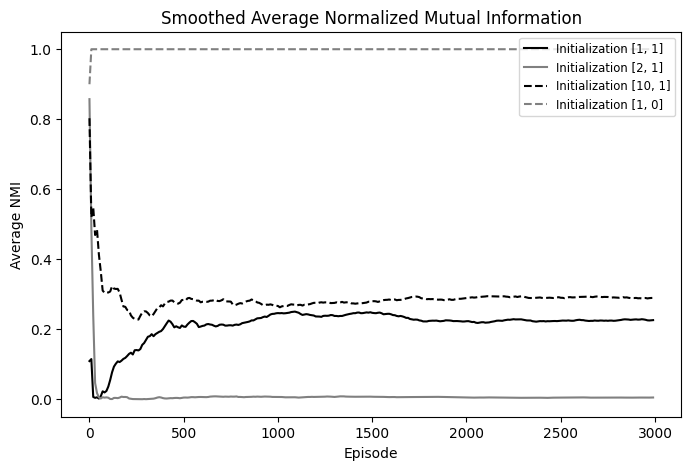

In [24]:
plt.figure(figsize=(8, 5))  # (width, height)

# 2 grayscale shades and 2 line styles
grayscale_colors = ['0.0', '0.5']  # Black, medium gray
linestyles = ['-', '--']          # Solid, dashed

for idx, key in enumerate(signal_information_histories):
    # Second smoothing (10-point moving average)
    smoothed_NMI = [
        sum(signal_information_histories[key][0][j:j+10]) / 10
        for j in range(0, n_episodes, 10)
    ]

    color = grayscale_colors[idx % 2]        # Alternates: black, gray, black...
    linestyle = linestyles[(idx // 2) % 2]   # 0–1: '-', 2–3: '--', 4–5: '-'

    plt.plot(
        range(0, n_episodes, 10),
        smoothed_NMI,
        color=color,
        linestyle=linestyle,
        label=f"Initialization {key}"
    )

plt.title("Smoothed Average Normalized Mutual Information")
plt.xlabel("Episode")
plt.ylabel("Average NMI")
plt.legend(loc="upper right", fontsize="small")